# Take-home exam 2d-visualization MVE080/MMG640

This notebook contains the questions for the take-home exam in the course Scientific visualization Autumn MVE080/MMG640. Provide the answers in the notebook and then upload the notebook as a html on Canvas.

**Important** - make sure to hand in the exam in time. You will have 24 hours (00:00-23:59) on 14-12-2022 to complete the exam. Late hands in will not be accepted. 

**Important** - you are not allowed to collaborate or do plagiarism by using available text/code on the internet. In case we detect plagiarism you will receive a failing grade.

**Important** - make sure that you complete and provide an answer to all the questions on the exam. In every code cell and cell on the format; *Provide answer here*, you should provide an answer. 

## Grading criteria

The grade on this take-home exam is either pass or fail. When correcting the exam I will look for the following things:

1. That the produced visual is readable. 
2. That given the task the visual effectively communicates the intended main message. 
3. That any potential motivations to why a visual is readable or not is correct. 
4. That appropriate colors have been used.

## Other information

You are allowed to use either R or Python to answer the questions below (both have notebook support). You are further allowed to use any plotting library you want. The code-snippet below loads the packages we primarily have used throughout the course.


In [45]:
# To load required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import * 
import geopandas as gpd

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Question 1 

During the course we have talked about colormaps for categorical and quantitative data. One type of colormap we have discussed is the divergent colormap. Below answer the following **three** questions:

1. Explain when it is suitable to use a divergent colormap.
2. Create a visual below where it is suitable to use a divergent colormap. You are allowed to reuse any visual you have created in the homework, or to create a new visual using any of the datasets available on Canvas. **You are not allowed to use any of the visuals from the lecture slides**. 
3. Motivate which message a divergent colormap helps to highlight in the created visual.


*Provide answer to the first part here*

A divergent colormap is useful for quantitative data. It uses two different color to represent positive and negative and the saturation of color can represent the magnitude. It is useful to visualize how far a value deviates from the mid point.

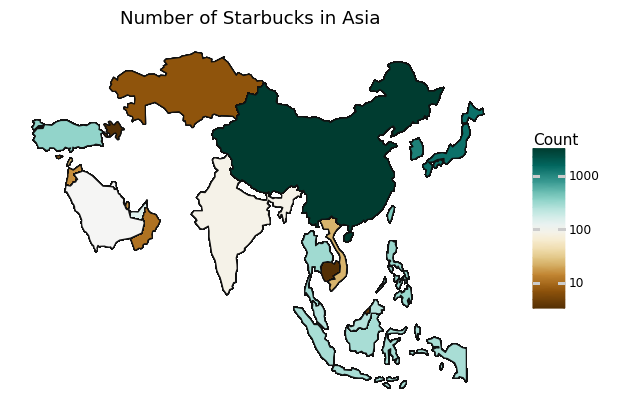

<ggplot: (186767836760)>

In [46]:
# Insert code for the visual here
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
asia = world[world["continent"] == "Asia"]

# data_plot = asia.merge(starbucks_stores, left_on="iso_a3", right_on="iso_a3") will give you a dataset you can work with

(ggplot(asia)
    + geom_map())

starbucks_stores = pd.read_csv("Data/HW3/Starbucks_data.csv")
data_plot = asia.merge(starbucks_stores, left_on="iso_a3", right_on="iso_a3")

data_plot = data_plot.assign(Count = lambda df: df['Country'].map(lambda d: np.count_nonzero(df['Country'] == d)))

p1 = (ggplot(data_plot)
    + geom_map(aes(fill="Count"))
    + scale_fill_cmap("BrBG", trans="log10")
    + labs(title = "Number of Starbucks in Asia")
    + theme(panel_background=element_rect(fill = "white"), 
            axis_ticks=element_blank(), 
            axis_text=element_blank()))
p1
# Do not forget to print the visual 

*Provide answer to the third part here*

The visual shows the number of Starbucks stores in different Asian countries. The colormap helps to highlight the countries with relatively more Starbucks and countries with relatively less Starbucks.

## Question 2

Below, a made-up example on proportion data showing book genre people prefer for the years 1990, 2000, and 2010 is given. Data are plotted as pie-charts. Answer the following **two** questions: 

1. Motivate why a pie-chart is ill-suited if we want to see how the proportion that prefer a certain genre, e.g. horror, has changed over time.
2. Create a visual from where it is easy to see how the proportion that prefer a certain genre has changed over the years. When creating the new visual, use appropriate colors. 

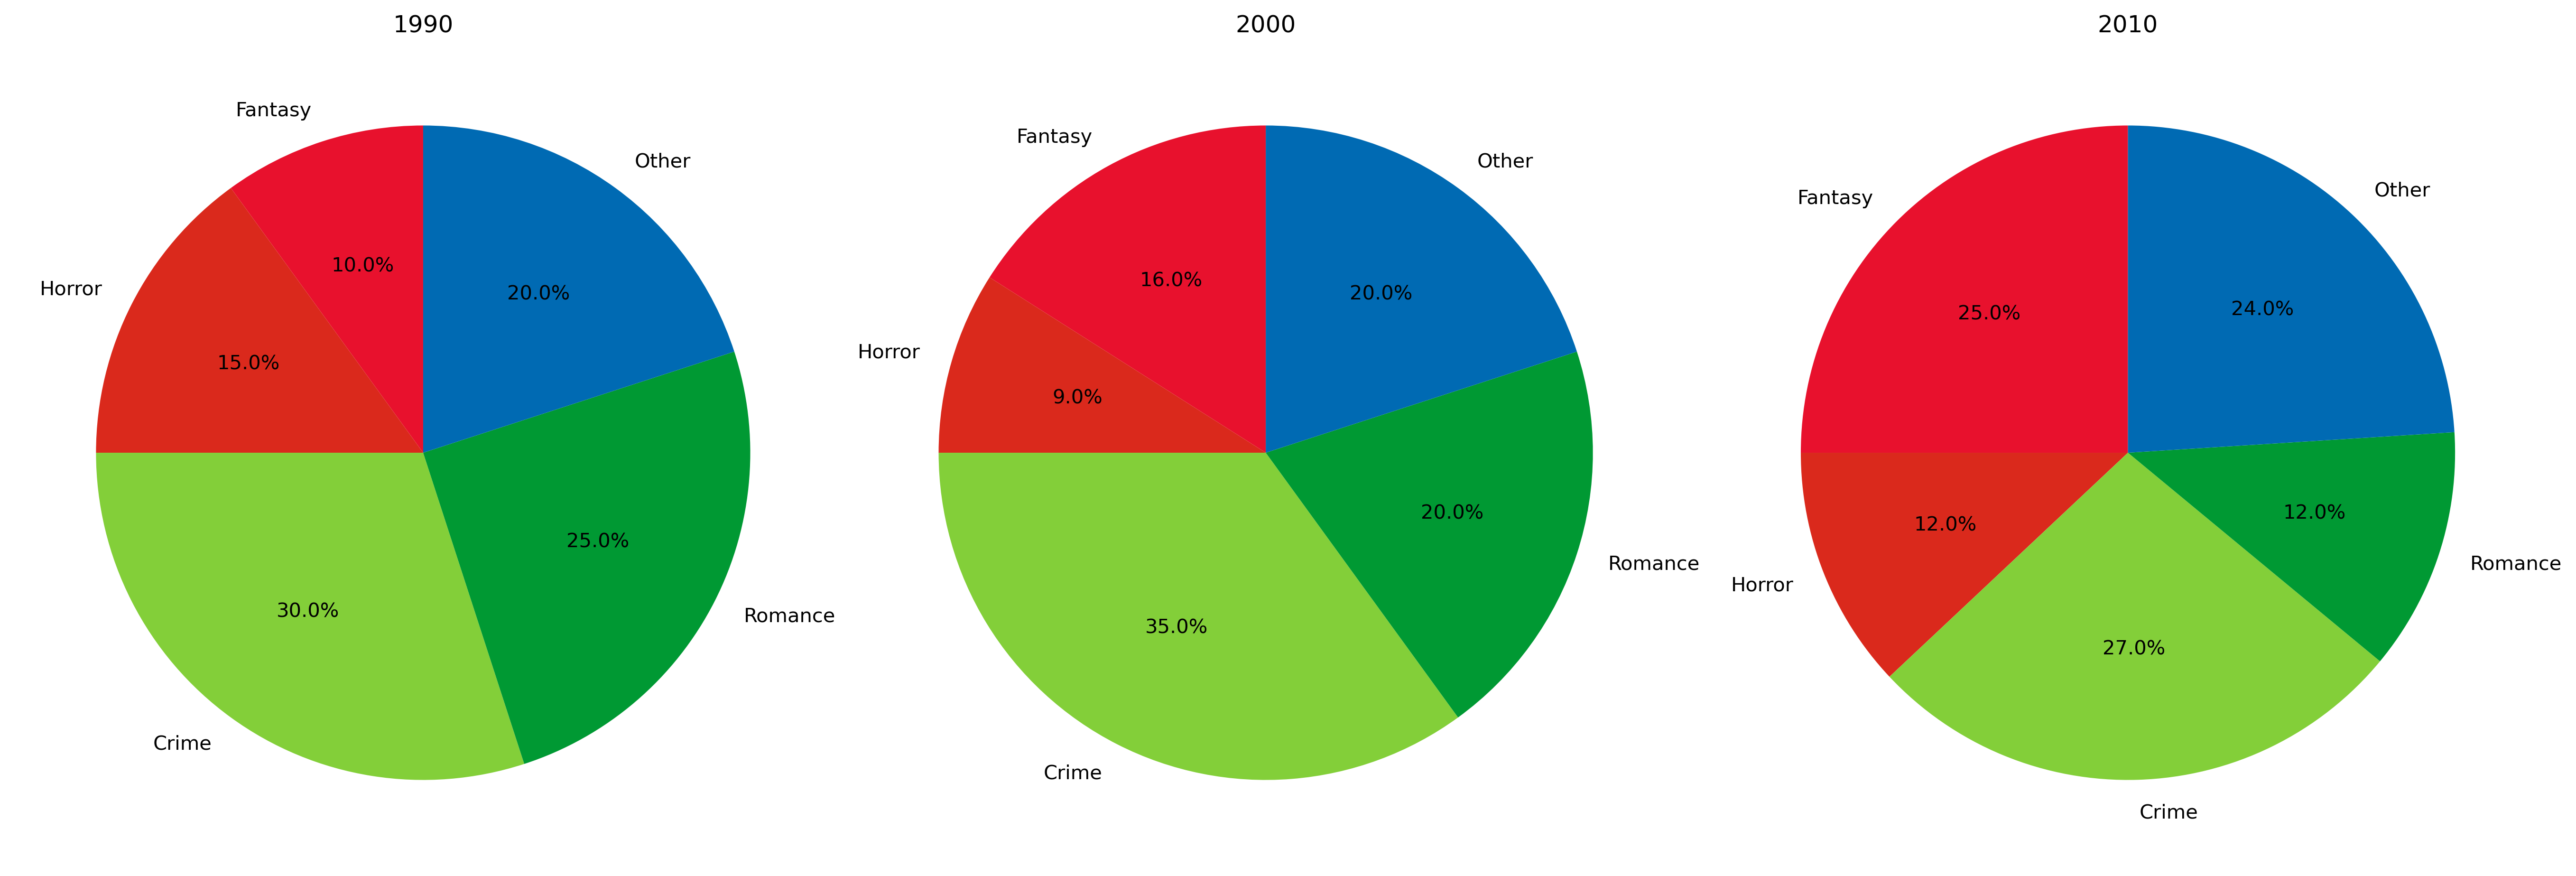

In [47]:
data_1990 = pd.DataFrame({"Genre" : ["Fantasy", "Horror", "Crime", "Romance", "Other"],
                          "Proportion" : [10, 15, 30, 25, 20],
                          "Year" : [1990, 1990, 1990, 1990, 1990], 
                          "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3"]})
data_2000 = pd.DataFrame({"Genre" : ["Fantasy", "Horror", "Crime", "Romance", "Other"],
                          "Proportion" : [16, 9, 35, 20, 20],
                          "Year" : [2000, 2000, 2000, 2000, 2000], 
                          "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3"]})                                 
data_2010 = pd.DataFrame({"Genre" : ["Fantasy", "Horror", "Crime", "Romance", "Other"],
                          "Proportion" : [25, 12, 27, 12, 24],
                          "Year" : [2010, 2010, 2010, 2010, 2010], 
                          "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3"]})                                                    



fig, axs = plt.subplots(1, 3, constrained_layout=True, dpi=300, figsize=(18, 10))

axs[0].pie(data_1990["Proportion"], 
        labels=data_1990["Genre"], 
        colors = data_1990["Color"], 
        autopct='%1.1f%%',
        startangle=90.0)
axs[0].set_title("1990")

axs[1].pie(data_2000["Proportion"], 
        labels=data_2000["Genre"], 
        colors = data_2000["Color"], 
        autopct='%1.1f%%',
        startangle=90.0)
axs[1].set_title("2000")

axs[2].pie(data_2010["Proportion"], 
        labels=data_2010["Genre"], 
        colors = data_2010["Color"], 
        autopct='%1.1f%%',
        startangle=90.0)
axs[2].set_title("2010")

plt.show()


*Provide answer to the first part here*

Pie chart can emphasize simple fraction but it is hard to compare a certain genre across years. Three pie charts are used for three years. It is hard to compare the proportion of a certain genre via angles in different pie charts.


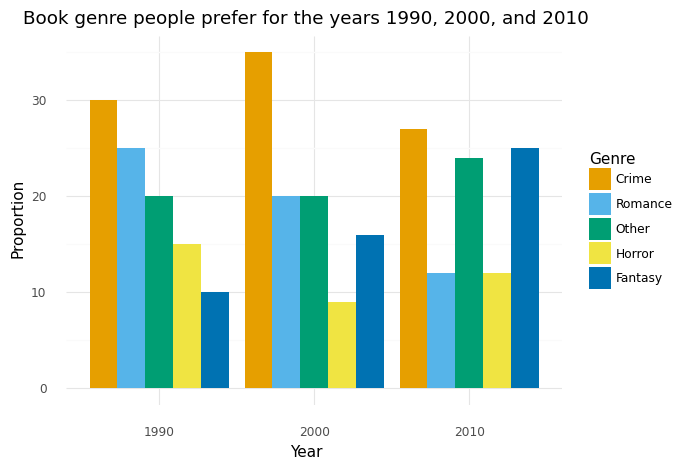

<ggplot: (186764745165)>

In [48]:
# Insert code for the visual here
book_genre = pd.concat([data_1990, data_2000])
book_genre = pd.concat([book_genre, data_2010])

book_genre = book_genre.assign(Genre = pd.Categorical(book_genre["Genre"], 
                                                           categories=["Crime", "Romance", "Other", "Horror", "Fantasy"]))

book_genre = book_genre.assign(Year = pd.Categorical(book_genre["Year"], 
                                                           categories=[1990, 2000, 2010]))

p = (ggplot(book_genre, aes("Year", "Proportion", fill = "Genre"))
    + geom_bar(stat = "identity", position="dodge")
    + scale_fill_manual(values = cbPalette)
    + labs(y = "Proportion", x= "Year", title = "Book genre people prefer for the years 1990, 2000, and 2010")
    + theme_minimal())

p
# Do not forget to print the visual 

## Question 3

On Canvas two different ways to plot the uncertainty for a curve fit are given. Which visual would you use for a lay audience (that is an audience not trained in statistics). Motivate!


*Provide answer here*

I would use Example 2. Example 1 includes the idea of confidence level. A lay audience may not have enough knowledge of it and get confused. Example 2 is more straight forward and easy to understand. It directly shows the random curve fits. 

## Question 4

On Canvas you have a heatmap showing forest coverage for various countries from 1970 to 2019. Answer the following **two** questions:

1. Using the dataset on Canvas recreate the visual, but, with a better suited colormap
2.  Motivate why your new colormap is an appropriate choice for this visual.

**Note**. When recreating the visual you do not need to have the countries in the same order on the y-axis as I do.


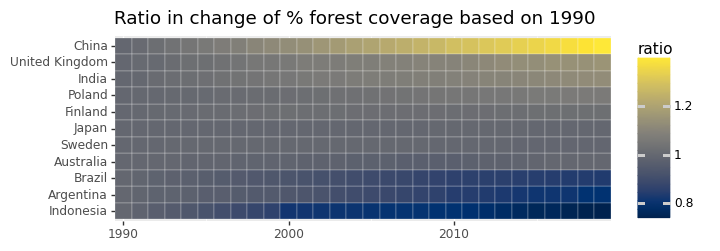

<ggplot: (186769502419)>

In [49]:
# Insert code for the visual here
forest_coverage = pd.read_csv("Data/Exam/Forest_tidy-1.csv")
forest_coverage = forest_coverage.assign(country = pd.Categorical(forest_coverage["country"], 
                                                           categories=["Indonesia", "Argentina", "Brazil", "Australia", "Sweden", "Japan", "Finland", "Poland", "India", "United Kingdom", "China"]))

p = (ggplot(forest_coverage, aes("Year", "country", fill = "ratio")) 
  + geom_tile(color="white") 
  + coord_fixed()
  #+ scale_y_discrete(limits = pos)  
  + scale_fill_cmap("cividis")
  + labs(x = "", y = "", title = "Ratio in change of % forest coverage based on 1990")
  + scale_x_continuous(expand=(0, 0), )
  #+ theme_minimal()
    )
p
# Do not forget to print the visual 

*Provide answer here to second part*

The new colormap uses two different colors to express the value above and below mid-point. Also, the saturation of color shows how far a value deviates from the mid point.

## Question 5

On Canvas there is a made-up dataset with temperature data for each day of the year. Using this dataset answer the following **two** questions: 
1. Visualize the data such that we can clearly see the median temperature and temperature distribution for each month. 
2. Comment on any particular features of the temperature distribution for September.

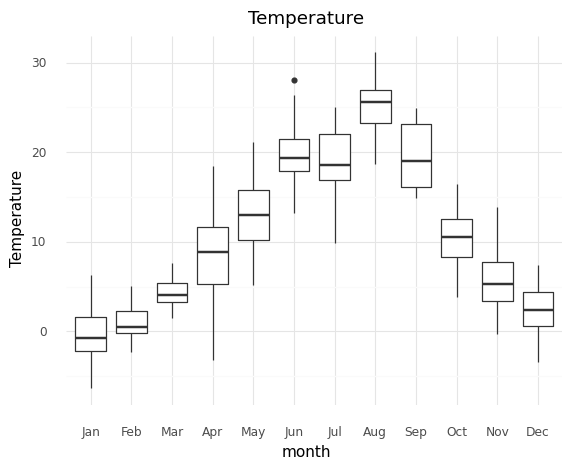

<ggplot: (186753522282)>

In [50]:
# Insert code for the visual here
temperature = pd.read_csv("Data/Exam/Temperature.csv")
temperature = temperature.assign(month = pd.Categorical(temperature["month"], 
                                                           categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]))
#display(temperature)

p1 = (ggplot(temperature, aes("month", y= "temp")) 
     + geom_boxplot()
     + labs(y = "Temperature", x = "month", title="Temperature")
     #+ scale_fill_manual(values = cbPalette, name="Year")
     + theme_minimal())

p1
# Do not forget to print the visual 

*Provide answer here to second part*

The box for September is big. The temperature distribution for September is broad. The median is more close to first quantile so the distribution is skewed left. 

## Question 6

A colleague of mine suggested that apartment prices in Sweden increase with population size. Using the dataset on Canvas create a visual which clearly shows the relationship between apartment prices and Sweden's population over time.

C:\Users\me\anaconda3\lib\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


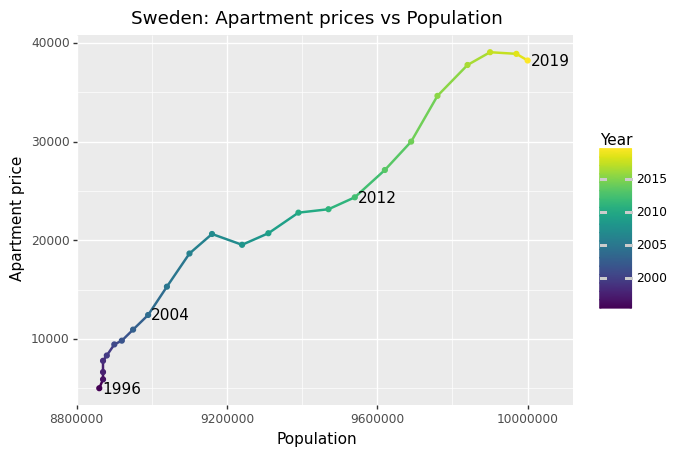

<ggplot: (186769208932)>

In [51]:
# Insert code for the visual here
house_price = pd.read_csv("Data/Exam/Pop_house_price.csv")
y = [1996, 2004, 2012, 2019]
house_price = house_price.assign(highlight = lambda df: df['Year'].map(lambda d: d if d in y else ""))

p = (ggplot(house_price)
     + aes("Population", "price", color = "Year")
     + scale_fill_cmap("viridis")
     + geom_path(size = 1, lineend="round")
     + geom_point()
     + geom_text(aes(label = 'highlight'), color='black', nudge_x = 60000)
     + labs(x = "Population", y = "Apartment price", title = "Sweden: Apartment prices vs Population")
    )

p
# Do not forget to print the visual 

## Question 7

On Canvas, you can find a dataset with inflation adjusted GDP per capita for several countries between 1920 and 2010. Using this dataset answer the following **three** questions: 
1. Select one question you want to investigate with a visual. 
2. Create that visual using data from at least two years and two countries. 
3. Motivate why your choice if visual is suitable to investigate your question. 

*Provide which question you want to investigate with a visual*

I want to investigate how the GDP per capita has changed for the nordic countries from 1991 to 2010

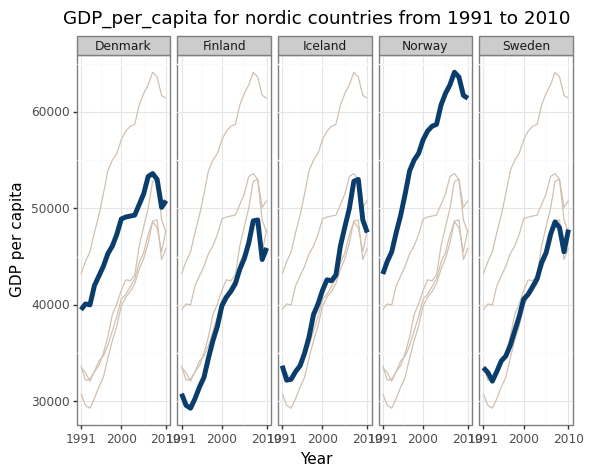

<ggplot: (186769213398)>

In [52]:
# Insert code for the visual here
gdp = pd.read_csv("Data/Exam/Data_gdp_per_capita.csv")
gdp = gdp.query("(country == 'Finland' or country == 'Sweden' or country == 'Denmark' or country == 'Iceland' \
                or country == 'Norway') and (Year > 1990)")
gdp_copy = gdp.copy()
gdp_copy["country_copy"] = gdp["country"]
gdp_copy = gdp_copy.drop("country", axis=1)

p2 = (ggplot(gdp, aes("Year", "GDP_per_capita"))
    + geom_line(data=gdp_copy, mapping=aes(x="Year", y="GDP_per_capita", group="country_copy"), size=0.5, color="#D0C0B0")
    + geom_line(aes(group="country"), size=2.0, color="#0A3D6B")
    + facet_wrap("~country", nrow=1)
    + labs(x = "Year", y = "GDP per capita", title = "GDP_per_capita for nordic countries from 1991 to 2010")
    + scale_x_continuous(breaks=[1991, 2000, 2010])
    + theme_bw())
p2
# Do not forget to print the visual 

*Provide answer here to third part*

There are many categories. To avoid the plot being too clumsy, I use facets to handle many categories. It seperates them to different subplots and highlight the corresponding data for each category. It makes the visual more readable and easy to compare across categories. 